In [88]:
#Importing Libraries
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Input,Lambda
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [89]:
#Defining the image size as VGG16 has got trained in image size of (224,224)
IMAGE_SIZE=[224,224]

In [90]:
#Saving the data location path in variables
df_train='../input/cat-and-dog/training_set'
df_test='.../input/cat-and-dog/test_set'

In [91]:
#Importing the VGG16 model and removing the last layer "include_top=False"
#We have to remove the last layer because we need to predict for 2 classes and VGG16 is 1000 class classification model
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [92]:
#Setting the weight updation of all layers as False as we will not train them
for layers in vgg.layers:
  layers.trainable=False

In [93]:
#Flattening the output of VGG16 model
x=Flatten()(vgg.output)

In [94]:
#Adding a dense layer for prediction
prediction=Dense(2,activation='sigmoid')(x)

In [95]:
#Instantiating a model
model=Model(inputs=vgg.input,outputs=prediction)

In [96]:
#Understanding the parameters of model
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [97]:
#Compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [98]:
#setting the parameters for train dataset
train_data=ImageDataGenerator(rescale=(1/255.0),
                              zoom_range=0.2,
                              rotation_range=0.2,
                              horizontal_flip=True,
                              shear_range=0.1)

In [99]:
#setting the parameters for test dataset 
test_data=ImageDataGenerator(rescale=(1/255.0))

In [100]:
#Creating more images using ImageDataGenerator class
training=train_data.flow_from_directory(directory='../input/cat-and-dog/training_set/training_set', target_size=(224,224), 
                                           classes=['cats', 'dogs'], batch_size=10, shuffle=False)
testing=test_data.flow_from_directory(directory= '../input/cat-and-dog/test_set/test_set', target_size=(224,224), classes=['cats', 'dogs'], 
                                       batch_size=10, shuffle=False)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [101]:
#fitting the model
answer=model.fit(training,validation_data=testing,epochs=10,steps_per_epoch=len(training),validation_steps=len(testing))

Epoch 1/10
801/801 [==============================] - 115s 144ms/step - loss: 0.8392 - accuracy: 0.7494 - val_loss: 0.2096 - val_accuracy: 0.9140
Epoch 2/10
801/801 [==============================] - 116s 144ms/step - loss: 0.2602 - accuracy: 0.8913 - val_loss: 0.3172 - val_accuracy: 0.8873
Epoch 3/10
801/801 [==============================] - 114s 142ms/step - loss: 0.2577 - accuracy: 0.8992 - val_loss: 0.1923 - val_accuracy: 0.9303
Epoch 4/10
801/801 [==============================] - 115s 143ms/step - loss: 0.2435 - accuracy: 0.9153 - val_loss: 0.2398 - val_accuracy: 0.9234
Epoch 5/10
801/801 [==============================] - 115s 143ms/step - loss: 0.1969 - accuracy: 0.9311 - val_loss: 0.2217 - val_accuracy: 0.9263
Epoch 6/10
801/801 [==============================] - 115s 143ms/step - loss: 0.2172 - accuracy: 0.9330 - val_loss: 0.3983 - val_accuracy: 0.8814
Epoch 7/10
801/801 [==============================] - 114s 143ms/step - loss: 0.1731 - accuracy: 0.9360 - val_loss: 0.2147 -

In [102]:
#Checking the keys stored in the variable answer
answer.history.keys

<function dict.keys>

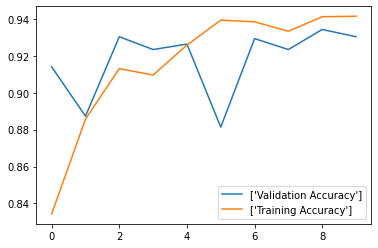

In [103]:
#Plotting the training accuracy and validation accuracy graphs
plt.plot(answer.history['val_accuracy'],label=['Validation Accuracy'])
plt.plot(answer.history['accuracy'],label=['Training Accuracy'])
plt.legend()

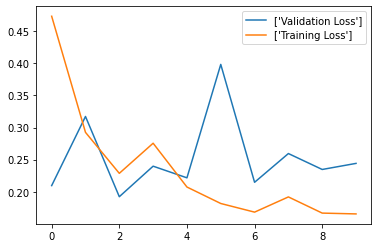

In [104]:
#plotting the training and validation loss graphs
plt.plot(answer.history['val_loss'],label=['Validation Loss'])
plt.plot(answer.history['loss'],label=['Training Loss'])
plt.legend()

In [105]:
#predicting using the model on the test data
y_pred=model.predict(testing)

In [106]:
#Storing the true values
y_test=testing.classes

In [107]:
#Getting the classification report
report =classification_report(y_true=testing.classes, y_pred=np.argmax(y_pred, axis=-1))
print(report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1011
           1       0.95      0.90      0.93      1012

    accuracy                           0.93      2023
   macro avg       0.93      0.93      0.93      2023
weighted avg       0.93      0.93      0.93      2023



[[967  44]
 [ 97 915]]


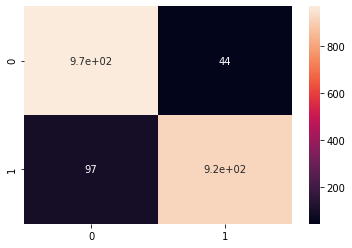

In [108]:
#Plotting the confusion matrix
cm = confusion_matrix(y_true=testing.classes, y_pred=np.argmax(y_pred, axis=-1))
sns.heatmap(cm,annot=True)
print(cm)

**Predicting using the model**

dog




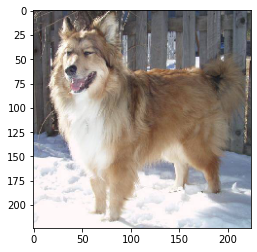

In [109]:
dat = '../input/cat-and-dog/test_set/test_set/cats/cat.4009.jpg' # For cat images
dat1 = '../input/cat-and-dog/test_set/test_set/dogs/dog.4006.jpg' # For Dog images

import numpy as np
from keras.preprocessing import image
test1 = image.load_img(dat1, target_size = (224, 224)) # Change when directory change 

test= image.load_img(dat1, target_size = (224, 224)) # Change when directory change 
test= image.img_to_array(test)
test = np.expand_dims(test, axis = 0)
result = model.predict(test)
training.class_indices
if result[0][0] == 1:
  prediction = 'cat'
else:
  prediction = 'dog'

print(prediction)
print('\n')
plt.imshow(test1)